In [ ]:
This notebook is copied from https://colab.research.google.com/drive/1TQ1-BTisMYZHIRVVNpVwDFPviXYMhT7A#scrollTo=segv077Q79nW for learning purpose.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sqrt, pi, floor

Equation of Gaussian Distribution

![Gaussian](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

Gaussian distribution with mean = 0 and stdv=1 (Standard Normal Curve)

![Gaussian](https://wikimedia.org/api/rest_v1/media/math/render/svg/3123d8dd4c3386afe9fac119fed2cfaf7ce9f336)

In [14]:
gauss = lambda x : exp(-(1/2)*((x)**2))/(sqrt(2*pi))

In [15]:
min_val = gauss(4) # for x=4, y is approximately zero
max_val = gauss(0) # for x=0, y is maximum beacause probability at mode==mean is maximum
print("=> min value y=%.3f for x=%d | max value y=%.3f for x=%d"%(min_val, 4, max_val, 0))
print("Is max value equals to 1/(2*pi) ? ==>",max_val == 1/sqrt(2*pi))

=> min value y=0.000 for x=4 | max value y=0.399 for x=0
Is max value equals to 1/(2*pi) ? ==> True


Rescale Gaussian Distribution Between 0 and 1

In [16]:
scaledGaussian = lambda x : exp(-(1/2)*(x**2))

In [17]:
scaled_min_val = scaledGaussian(4)
scaled_max_val = scaledGaussian(0)
print("=> Rescaled min value %.3f | Rescaled max value %.3f"%(scaled_min_val, scaled_max_val))

=> Rescaled min c value 0.000 | Rescaled max value 1.000


Grayscale to Heatmap Conversion

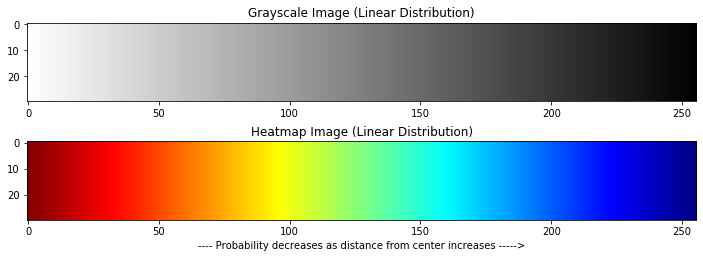

In [5]:
GrayScaleStrip = np.zeros((30,256), np.uint8)
for i in range(256):
  GrayScaleStrip[:,i] = 255-i
  

#Convert Grayscale to HeatMap Using Opencv
HeatmapStrip = cv2.applyColorMap(GrayScaleStrip, cv2.COLORMAP_JET)

fig = plt.figure(figsize=(12,4))
plt.subplot(211)
plt.title("Grayscale Image (Linear Distribution)")
plt.imshow(GrayScaleStrip, cmap="gray")
plt.subplot(212)
plt.title("Heatmap Image (Linear Distribution)")
plt.imshow(cv2.cvtColor(HeatmapStrip,4))
plt.xlabel("---- Probability decreases as distance from center increases ----->")
plt.show()

Rescaling linear distribution to Gaussian distribution

In [7]:
GaussianGrayscale = np.zeros((30,256), np.uint8)
for i in range(256):
  realValueFromZeroToOne = i/255
  scaledToZeroToFour = realValueFromZeroToOne*4
  gaussianValueFromOneToZero = scaledGaussian(scaledToZeroToFour)
  GaussianGrayscale[:,i] = gaussianValueFromOneToZero*255
  
#Convert Grayscale to HeatMap Using Opencv
GaussianHeatmapStrip = cv2.applyColorMap(GaussianGrayscale, cv2.COLORMAP_JET)


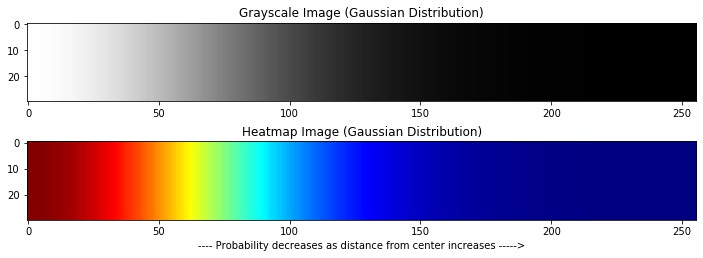

In [8]:
fig = plt.figure(figsize=(12,4))
plt.subplot(211)
plt.title("Grayscale Image (Gaussian Distribution)")
plt.imshow(GaussianGrayscale, cmap="gray")
plt.subplot(212)
plt.title("Heatmap Image (Gaussian Distribution)")
plt.imshow(cv2.cvtColor(GaussianHeatmapStrip,4))
plt.xlabel("---- Probability decreases as distance from center increases ----->")
plt.show()

Creating 2-dimensional isotropic Gaussian map

In [9]:
imgSize = 512
isotropicGrayscaleImage = np.zeros((imgSize,imgSize),np.uint8)

In [10]:
for i in range(imgSize):
  for j in range(imgSize):
    
    # find euclidian distance from center of image (imgSize/2,25imgSize/25) 
    # and scale it to range of 0 to 2.5 as scaled Gaussian
    # returns highest probability for x=0 and approximately
    # zero probability for x > 2.5
    distanceFromCenter = 2.5*np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))/(imgSize/2)
    scaledGaussianProb = scaledGaussian(distanceFromCenter)
    isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)

In [11]:
#Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGrayscaleImage, cv2.COLORMAP_JET)

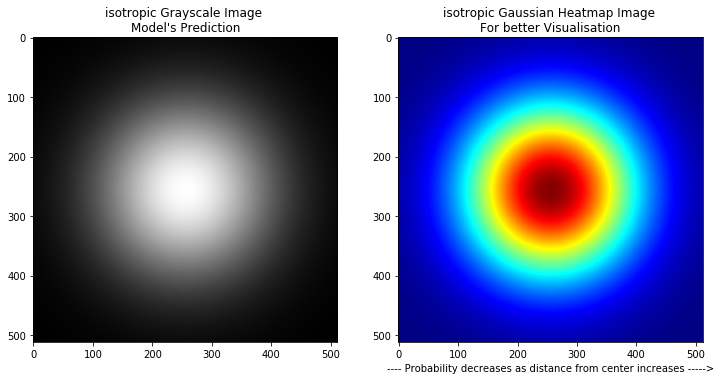

In [12]:
fig = plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title("isotropic Grayscale Image \nModel's Prediction")
plt.imshow(isotropicGrayscaleImage, cmap="gray")
plt.subplot(122)
plt.title("isotropic Gaussian Heatmap Image \nFor better Visualisation")
plt.imshow(cv2.cvtColor(isotropicGaussianHeatmapImage,4))
plt.xlabel("---- Probability decreases as distance from center increases ----->")
plt.show()

In [13]:
import cv2
import numpy as np
from math import exp

# Probability as a function of distance from the center derived
# from a gaussian distribution with mean = 0 and stdv = 1
scaledGaussian = lambda x : exp(-(1/2)*(x**2))


imgSize = 512
isotropicGrayscaleImage = np.zeros((imgSize,imgSize),np.uint8)

for i in range(imgSize):
  for j in range(imgSize):

    # find euclidian distance from center of image (imgSize/2,imgSize/2) 
    # and scale it to range of 0 to 2.5 as scaled Gaussian
    # returns highest probability for x=0 and approximately
    # zero probability for x > 2.5

    distanceFromCenter = np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))
    distanceFromCenter = 2.5*distanceFromCenter/(imgSize/2)
    scaledGaussianProb = scaledGaussian(distanceFromCenter)
    isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)

# Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGrayscaleImage, 
                                                  cv2.COLORMAP_JET)